<a href="https://colab.research.google.com/github/d29parkar/DIP-Project---EDITH-The-Smart-Stick/blob/nishtha/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **13.Multiple Linear Regression**

## 13.1 What is Multiple Linear Regression?

Multiple linear regression (MLR), also known simply as multiple regression, is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. The goal of multiple linear regression is to model the linear relationship between the explanatory (independent) variables and response (dependent) variables.

**Multiple Linear Regression Formula**

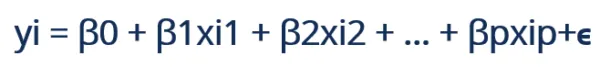

Where:

- yi​ is the dependent or predicted variable
- β0 is the y-intercept, i.e., the value of y when both xi and x2 are 0.
- β1 and β2 are the regression coefficients representing the change in y relative to a one-unit change in xi1 and xi2, respectively.
- βp is the slope coefficient for each independent variable
- ϵ is the model’s random error (residual) term.

### 13.1.1 Assumptions in Multiple Linear Regression

1. A linear relationship between the dependent and independent variables.

2. The independent variables are not highly correlated with each other.

3. The variance of the residuals is constant.

4. The model assumes that the observations should be independent of one another.

5. Multivariate normality occurs when residuals are normally distributed.

### 13.1.2 Simple Linear Regression vs Multiple Linear Regression

Let us address this with an example.

Imagine that you built two separate simple regression models - one uses height to predict weight and the other uses age to predict weight. Now, imagine you have a 15 year old who is 5"8'. Your age model predicts he weighs 120 lbs and your height model predicts he weighs 140 lbs. Well, which should you believe? If you built a multiple regression model you could use both the age and height information simultaneously to get a single, optimal prediction for this individual's weight.

## 13.2 Feature Selection

The input variables that we give to our machine learning models are called features. Each column in our dataset constitutes a feature. To train an optimal model, we need to make sure that we use only the essential features. If we have too many features, the model can capture the unimportant patterns and learn from noise. The method of choosing the important parameters of our data is called Feature Selection. 

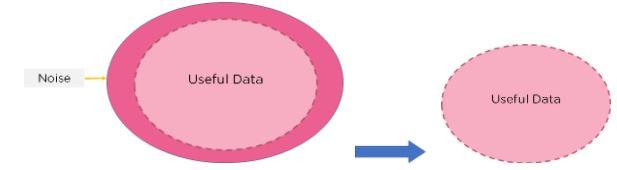

What are Benefits of performing feature selection before modeling your data?

· **Reduces Overfitting**: Less redundant data means less opportunity to make decisions based on noise.

· **Improves Accuracy**: Less misleading data means modeling accuracy improves.

· **Reduces Training Time**: fewer data points reduce algorithm complexity and algorithms train faster.

### 13.2.1 Feature Selection Models

Feature selection models are of two types:

**Supervised Models**: Supervised feature selection refers to the method which uses the output label class for feature selection. They use the target variables to identify the variables which can increase the efficiency of the model

**Unsupervised Models**: Unsupervised feature selection refers to the method which does not need the output label class for feature selection. We use them for unlabelled data.

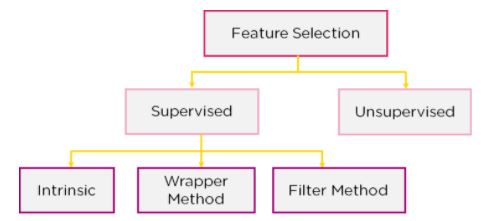

We can further divide the supervised models into three -

#### **1. Filter Method**

 In this method, features are dropped based on their relation to the output, or how they are correlating to the output. We use correlation to check if the features are positively or negatively correlated to the output labels and drop features accordingly. Eg: Information Gain, Chi-Square Test, Fisher’s Score, etc. 

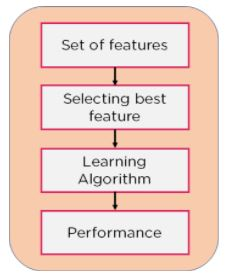

#### **2. Wrapper Method**

We split our data into subsets and train a model using this. Based on the output of the model, we add and subtract features and train the model again. It forms the subsets using a greedy approach and evaluates the accuracy of all the possible combinations of features. Eg: Forward Selection, Backwards Elimination, etc.

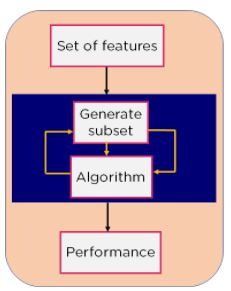

#### **3. Intrinsic Method**

This method combines the qualities of both the Filter and Wrapper method to create the best subset. This method takes care of the machine training iterative process while maintaining the computation cost to be minimum. Eg: Lasso and Ridge Regression.

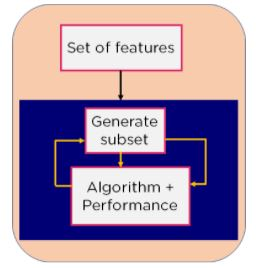

### 13.2.2 How to Choose a Feature Selection Model?

How do we know which feature selection model will work out for our model? The process is relatively simple, with the model depending on the types of input and output variables.

Variables are of two main types:

**Numerical Variables**: Which include integers, float, and numbers.

**Categorical Variables**: Which include labels, strings, boolean variables, etc.

Based on whether we have numerical or categorical variables as inputs and outputs, we can choose our feature selection model as follows:

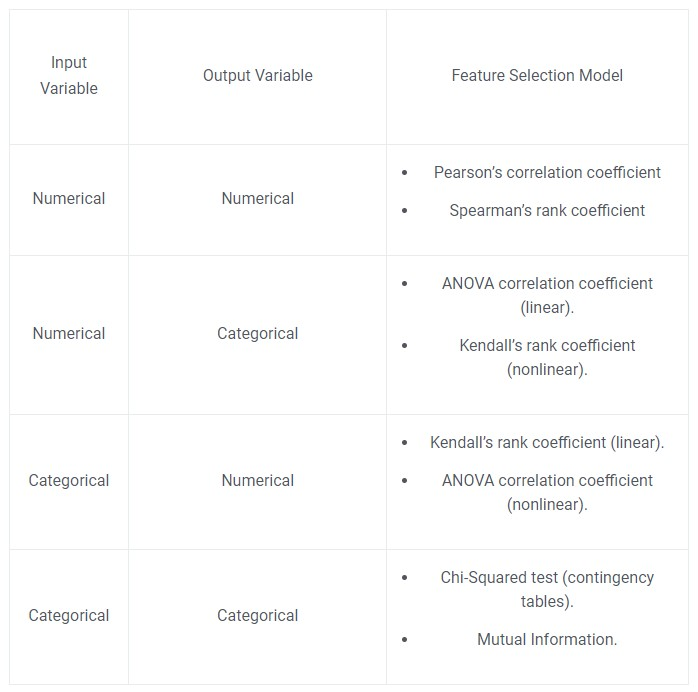

### 13.2.3 Feature Selection Techniques using Python

Three easy to use feature selection techniques have been discussed below- 

1. Univariate Selection
2. Feature Importance
3. Correlation Matrix with Heatmap

You can download the dataset from [here](https://drive.google.com/file/d/15VyslW7KGAlbos8hUZ9dzxNkkk-pyK0T/view?usp=sharing).

#### **Univariate Selection**

Statistical tests can be used to select those features that have the strongest relationship with the output variable.
The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Mobile Price Range Prediction Dataset.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

data = pd.read_csv("/content/train.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

print(featureScores.nlargest(10,'Score'))  #print 10 best features

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


Top 10 Best Features using SelectKBest Class

#### **Feature Importance**

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

[0.06089134 0.02048183 0.03304896 0.01821011 0.03225589 0.01793993
 0.03535567 0.03471568 0.03679267 0.03381914 0.0340364  0.04670351
 0.04832318 0.39029445 0.03345318 0.03406043 0.03591077 0.01453306
 0.01915267 0.02002112]


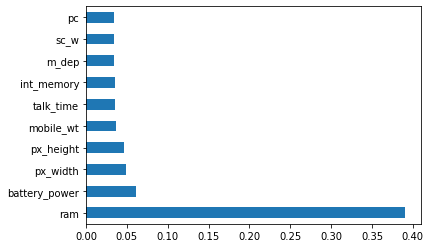

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/train.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#### **Correlation Matrix with Heatmap**

Correlation states how the features are related to each other or the target variable.
Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

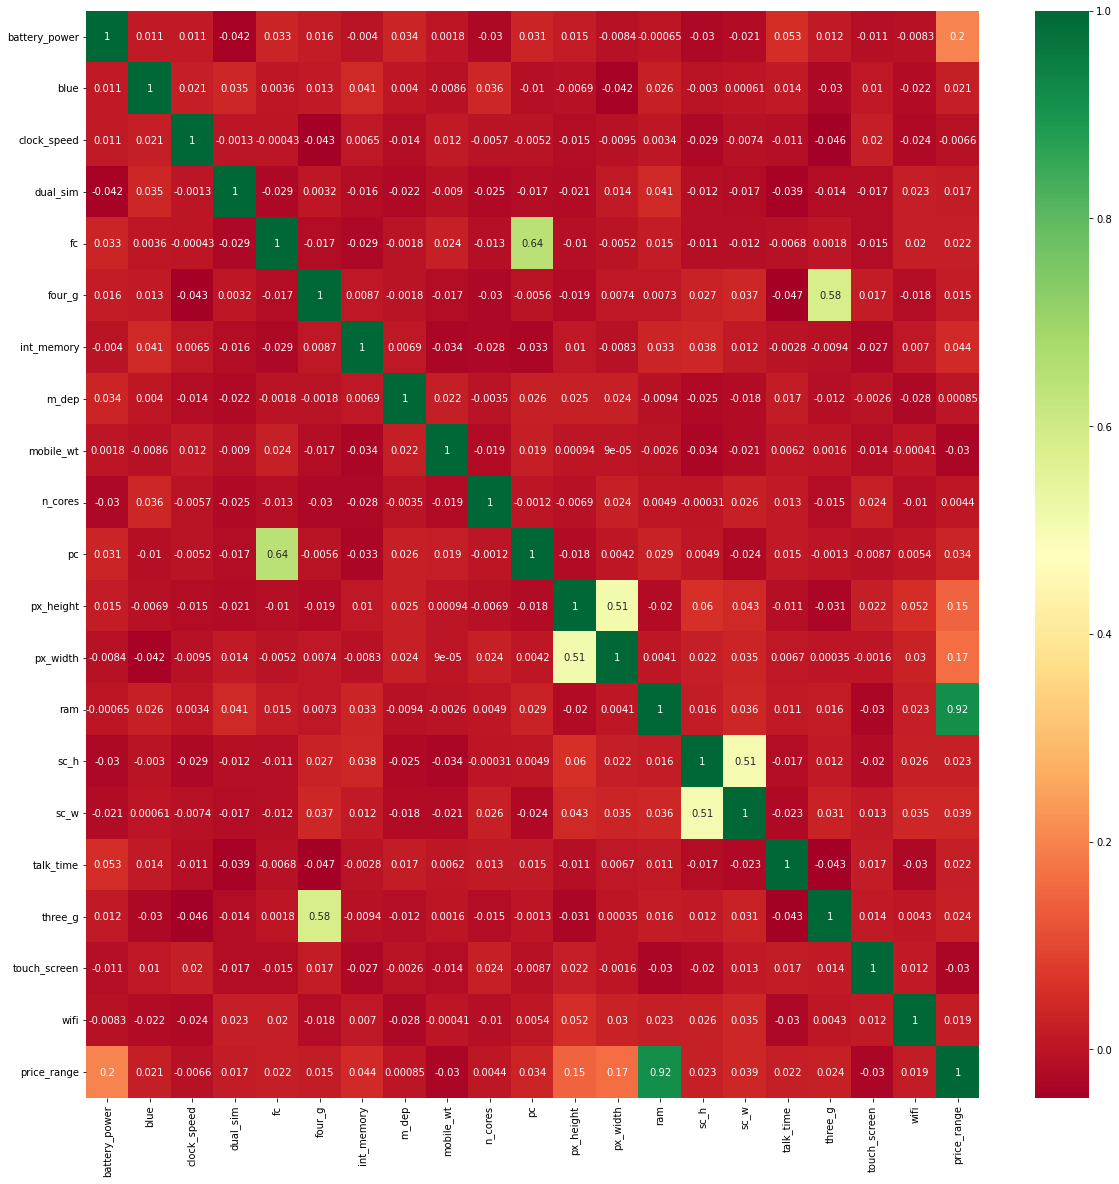

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv("/content/train.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Have a look at the last row i.e price range, see how the price range is correlated with other features, ram is the highly correlated with price range followed by battery power, pixel height and width while m_dep, clock_speed and n_cores seems to be least correlated with price_range.

## 13.3 Multiple Linear Regression using Python



Here the aim is to build a model which predicts sales based on the money spent on different platforms such as TV, radio, and newspaper for marketing by using simple linear regression and multiple linear regression. This is to understand and compare the difference between the two. 

The dataset can be found [here](https://github.com/Harshita0109/Sales-Prediction/blob/master/advertising.csv)

**Pre-processing Operations**
1. Checking for missing values 
2. Checking for duplicate values 
3. Checking for outliers/extreme values

**Exploratory Data Analysis**

1. Distribution of the target variable
2. How sales is related to other independent variables
3. Correlation between the variables

**Model Building**

**Prediction Using:**

Simple Linear Regression

Multiple Linear Regression

In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading the dataset
dataset = pd.read_csv("/content/advertising.csv")

In [ ]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


#### **Data Preprocessing**

In [ ]:
dataset.shape

(200, 4)

**1. Check for Missing Values** 

In [ ]:
dataset.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Conclusion: The dataset does not have missing values.

**2. Checking for Dulicate Rows**

In [ ]:
dataset.duplicated().any()

False

Conclusion: There are no duplicate rows present in the dataset.

**3. Checking for outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


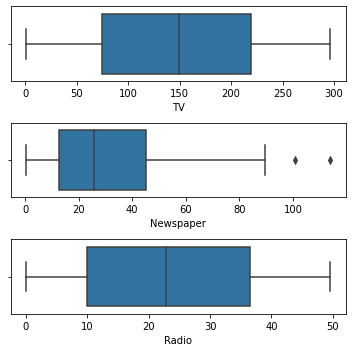

In [ ]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(dataset['TV'], ax = axs[0])
plt2 = sns.boxplot(dataset['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(dataset['Radio'], ax = axs[2])
plt.tight_layout()

Conclusion: There are not that extreme values present in the dataset

#### **Exploratory Data Analysis**

**1. Distribution of the Target Variable**

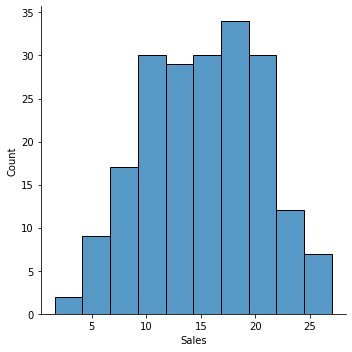

In [ ]:
sns.displot(dataset['Sales']);

Conclusion: It is normally distributed.

**2. How Sales are related with other Variables**

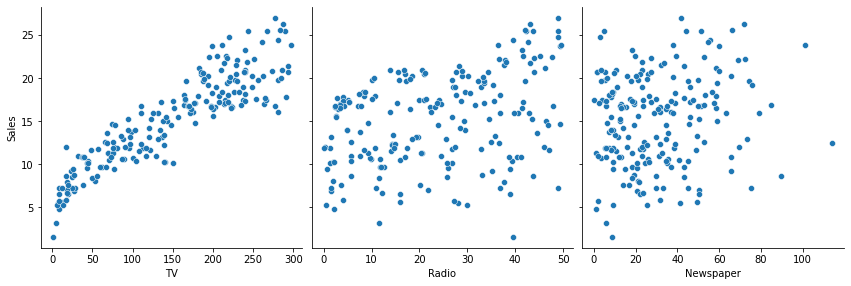

In [ ]:
sns.pairplot(dataset, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

Conclusion: TV is strongly, positively, linearly correlated with the target variable. Bu the Newspaper feature seems to be uncorrelated.

**3. Heatmap**

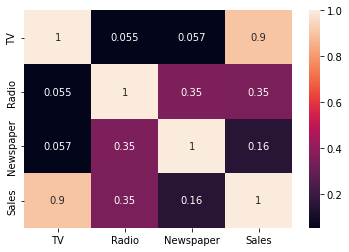

In [ ]:
sns.heatmap(dataset.corr(), annot = True)
plt.show()

Conclusion: TV seems to be most correlated with Sales as 0.9 is very close to 1.

#### **Model Building**

Equation: Sales = β0 + (β1 TV) + (β2 Radio) + (β3 * Newspaper)

In [ ]:
#Setting the value for X and Y
x = dataset[['TV', 'Radio', 'Newspaper']]
y = dataset['Sales']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=100)

In [ ]:
mlr= LinearRegression()  
mlr.fit(x_train, y_train) 

LinearRegression()

In [ ]:
#Printing the model coefficients
print(mlr.intercept_)
# pair the feature names with the coefficients
list(zip(x, mlr.coef_))

4.334595861728431


[('TV', 0.053829108667250075),
 ('Radio', 0.11001224388558055),
 ('Newspaper', 0.0062899501461303325)]

In [ ]:
#Predicting the Test and Train set result 
y_pred_mlr= mlr.predict(x_test)  
x_pred_mlr= mlr.predict(x_train)  

In [ ]:
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [ 9.35221067 20.96344625 16.48851064 20.10971005 21.67148354 16.16054424
 13.5618056  15.39338129 20.81980757 21.00537077 12.29451311 20.70848608
  8.17367308 16.82471534 10.48954832  9.99530649 16.34698901 14.5758119
 17.23065133 12.56890735 18.55715915 12.12402775 20.43312609 17.78017811
 16.73623408 21.60387629 20.13532087 10.82559967 19.12782848 14.84537816
 13.13597397  9.07757918 12.07834143 16.62824427  8.41792841 14.0456697
  9.92050209 14.26101605 16.76262961 17.17185467 18.88797595 15.50165469
 15.78688377 16.86266686 13.03405813 10.47673934 10.6141644  20.85264977
 10.1517568   6.88471443 17.88702583 18.16013938 12.55907083 16.28189561
 18.98024679 11.33714913  5.91026916 10.06159509 17.62383031 13.19628335]


In [ ]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff

,Actual value,Predicted value
126,6.6,9.352211
104,20.7,20.963446
99,17.2,16.488511
92,19.4,20.109710
111,21.8,21.671484
167,17.2,16.160544
116,12.2,13.561806
96,16.7,15.393381
52,22.6,20.819808
69,22.3,21.005371


In [ ]:
#Predict for any value
mlr.predict([[56, 55, 67]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([13.82112602])

Conclusion: The model predicted the Sales of 13.82 in that market

In [ ]:
# print the R-squared value for the model
print('R squared value of the model: {:.2f}'.format(mlr.score(x,y)*100))

R squared value of the model: 90.11


Conclusion: 90.21% of the data fit the multiple regression model

In [ ]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 1.227818356658941
Mean Square Error: 2.6360765623280655
Root Mean Square Error: 1.623599877533891


## 13.4 Exercise

###**Exercise 1: Implementing Multiple Linear Regression**

Congratulations! You just got to the end of this module. Now, your client is a real estate agent and wants some help predicting housing prices for regions in the USA. It would be great if you could somehow create a model for her that allows her to put in a few features of a house and returns back an estimate of what the house would sell for.

She has asked you if you could help her out with your new data science skills. You say yes, and decide that Linear Regression might be a good path to solve this problem!

Your client then gives you some information about a bunch of houses in regions of the United States,it is all in the data set: [USA_Housing.csv](https://drive.google.com/file/d/1MDypsoFpJ33-VERJO3MsjBomCACCwf3i/view?usp=sharing)

The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline

In [ ]:
#Write your code here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Get the Data

In [ ]:
#Write your code here.

USAhousing = pd.read_csv('/content/USA_Housing.csv')

**Check the head of USAhousing, and check out its info() and describe() methods.**

In [ ]:
#Write your code here

USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
#Write your code here

USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [ ]:
#Write your code here

USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
#Find the columns

USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

####Exploratory Data Analysis

Now let's visualize the data and create some plots to understand the trends & correlation.

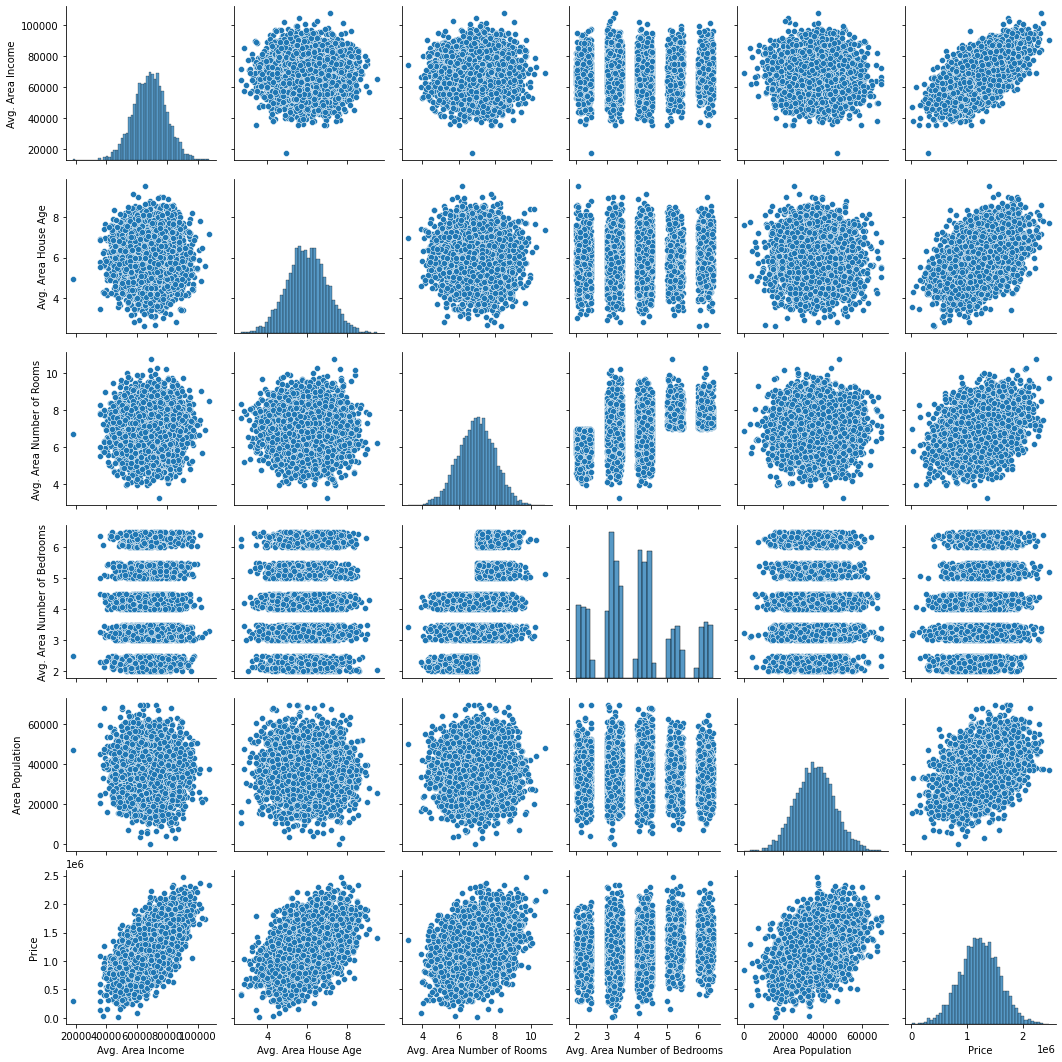

In [ ]:
#Write your code here to create pairplots

sns.pairplot(USAhousing)

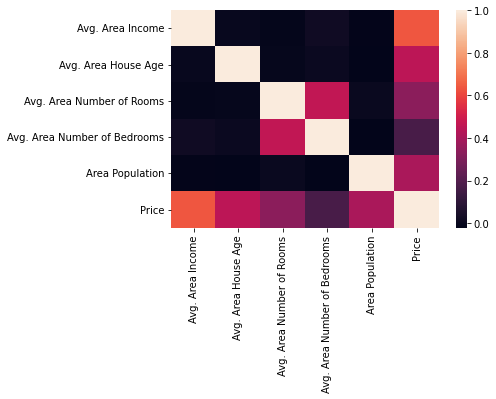

In [ ]:
#Write your code here to produce a heatmap

sns.heatmap(USAhousing.corr())

#### Training a Linear Regression Model

Let's now begin to train out regression model! You will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. Remember to toss out the Address column because it only has text info that the linear regression model can't use.

In [ ]:
#Write your code here to create X & Y

X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

Now split the data into a training set and a testing set. We will train our model on the training set and then use the test set to evaluate the model.

In [ ]:
#Write your code here to import train_test_split

from sklearn.model_selection import train_test_split

In [ ]:
#Write your code here

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

#### Creating & Training the Model

In [ ]:
#Write your code here

from sklearn.linear_model import LinearRegression

In [ ]:
#Write your code here

lm = LinearRegression()

In [ ]:
#Write your code here

lm.fit(X_train,y_train)

LinearRegression()

#### Evaluating the Model

Evaluate the model by checking out it's coefficients and how we can interpret them.

In [ ]:
#Print the intercept

print(lm.intercept_)

-2640159.7968526958


In [ ]:
#Print the coefficients

coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of $X**.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$Y**.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$Z**.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$W**.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$V**.

The value of X, Y, Z, W & V are the respective coefficients.


####Prediction from the Model

Let's grab predictions off our test set and see how well it did!

In [ ]:
#Write your code here

predictions = lm.predict(X_test)

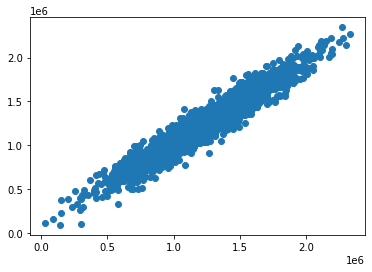

In [ ]:
#Write your code here to create a scatter plot

plt.scatter(y_test,predictions)

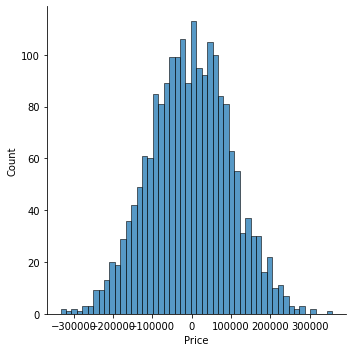

In [ ]:
#Write your code here to make a residual histogram

sns.displot((y_test-predictions),bins=50);

####Regression Evaluation Metrics

Now let's assess how our model performed by calculating the MAE, MSE & RMSE score!

In [ ]:
#Write your code here to import metrics

from sklearn import metrics

In [ ]:
#Print all the scores

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22251914942
MSE: 10460958907.20898
RMSE: 102278.82922290899


This was your first real Machine Learning Project! Congrats on helping your client out! We'll let this end here for now, but go ahead and explore different techniques & data sets if it was interesting to you! 

**Great Job!**

###**Exercise 2**

Now let's dive into the mathematical concepts of multiple linear regression through some questions.

Question: A scientific foundation wanted to evaluate the relation between y= salary of researcher (in thousands of dollars), x1= number of years of experience, x2= an index of publication quality, x3=sex (M=1, F=0) and
x4= an index of success in obtaining grant support. A sample of 35 randomly selected researchers was used to fit the multiple regression model. Parts of the computer output appear below


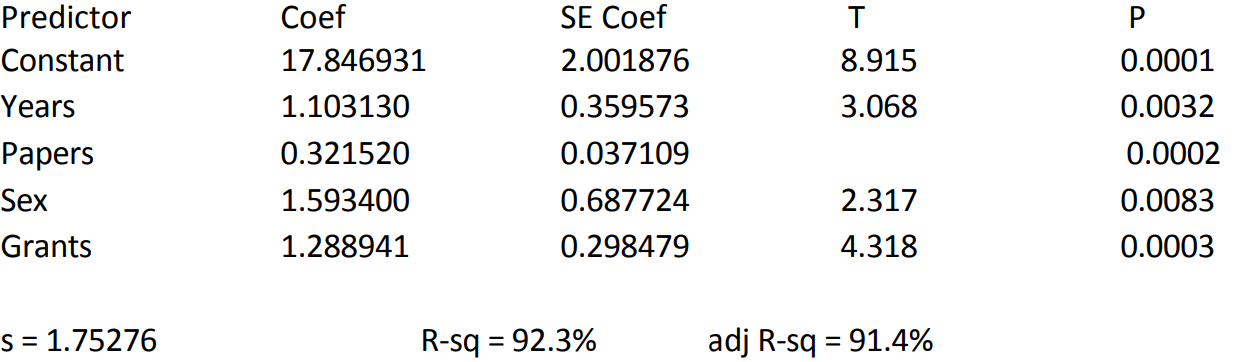

Q1. The least squares line fitted to the data is:

a) salary = 2.001 + 0.33 x1 + 0.04 x2 + 0.69 x3 + 0.30 x4 + ε

b) salary = 17.85 + 1.10 x1 + 0.32 x2 + 1.59 x3 + 1.29 x4 + ε

c) salary = 2.001 + 0.33 x1 + 0.04 x2 + 0.69 x3 + 0.30 x4

d) salary = 17.85 + 1.10 x1 + 0.32 x2 + 1.59 x3 + 1.29 x4

Q2. The variable that helps the most in predicting salary is:

a) intercept 

b) years 

c) papers 

d) sex 

e) grants

Q3.  How many degrees of freedom does the t* value from the previous question have?

a) 34 

b) 33 

c) 30 

d) 4

Q4. According to the assumptions, what has to have a Normal distribution and constant variance?

a) the researchers 

b) the years 

c) the variables 

d) the salaries

Wonderful. Now let's see how you did.

**Solutions**

1. d

2. c

3. c
4. d

###**Exercise 3**

Question: Data for 51 U.S. “states” (50 states, plus the District of Columbia) was used to examine the relationship between violent crime rate (violent crimes per 100,000 persons per year) and the predictor variables of urbanization (percentage of the population living in urban areas) and poverty rate. A predictor variable indicating whether or not a state is classified as a Southern state (1 = Southern, 0 = not) was also included. Some Minitab
output for the analysis of this data is shown below (with some information intentionally left blank).

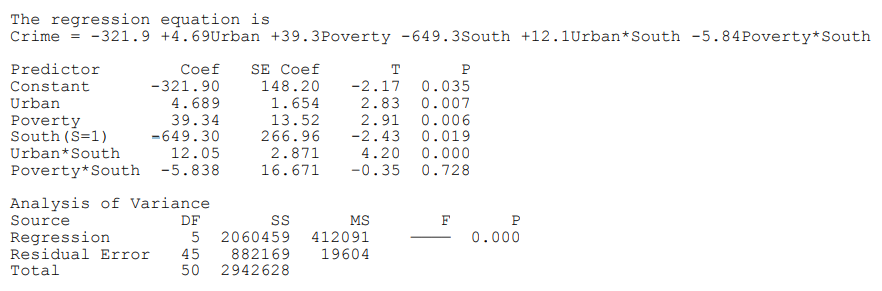


Q1. Which of the following represents the fitted relationship
between crime, urbanization, and poverty for Southern states?

a) Crime = –321.9 + 4.69Urban + 39.3Poverty

b) Crime = –315.6 + 4.69Urban + 39.3Poverty

c) Crime = –315.6 + 16.8Urban + 33.5Poverty

d) Crime = –971.2 + 16.8Urban + 33.5Poverty

e) Crime = –971.2 + 4.69Urban + 39.3Poverty

Q2. Predict the violent crime rate for a Southern state with an urbanization of 55.4 and a poverty rate of 13.7.

a) 417.2 

b) 510.1 

c) 535.8

d) 582.4 

e) 633.5


Q3. Predict the violent crime rate for a non-Southern state with an urbanization of 65.6 and a poverty rate of 8.0.

a) 300.4 

b) 336.5 

c) 349.1

d) 416.9 

e) 432.2

Great job! Now let's check out the answers.

**Solutions**

1. d
2. a
3. a

###**Exercise 4**

Since we have reached the end of this course, let us revisit some of the old concepts that we studied.

Match the statements below with the corresponding terms from the list.

a) multicollinearity 

b) extrapolation

c) R2  adjusted 

d) quadratic regression

e) interaction 

f) residual plots

g) fitted equation 

h) dummy variables

i) cause and effect 

j) multiple regression model

k) R2

l) residual

m) influential points

n) outliers

____ Used when a numerical predictor has a curvilinear relationship with the response.

____ Worst kind of outlier, can totally reverse the direction of association between x and y.

____ Used to check the assumptions of the regression model.

____ Used when trying to decide between two models with different numbers of predictors.

____ Used when the effect of a predictor on the response depends on other predictors.

____ Proportion of the variability in y explained by the regression model.

____ Is the observed value of y minus the predicted value of y for the observed x.

____ A point that lies far away from the rest.

____ Can give bad predictions if the conditions do not hold outside the observed range of x's.

____ Can be erroneously assumed in an observational study.

____ y= α +β1x1+β2x2+...+βpxp+ε ε~N(0,σ2)

____ yˆ=a+b1x1+b2x2+...+bpxp

____ Problem that can occur when the information provided by several predictors overlaps.

____ Used in a regression model to represent categorical variables. 

Completed? Let's check how well you did.

**Solutions**

d, m, f, c, e, k, l, n, b, i, j, g, a, h

**Congratulations! You did it. You successfully completed this module and are ready to tread the world of Data Science!**